In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/Datasets/train_ctrUa4K.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Datasets/test_lAUu6dG.csv')

In [4]:
tr_og = train.copy()
te_og = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*Visualisation*

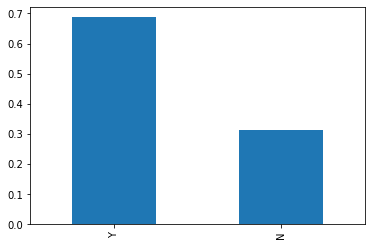

In [19]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

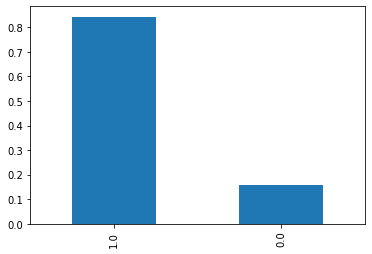

In [20]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


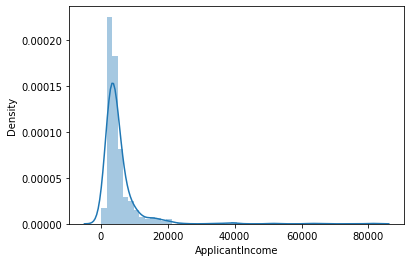

In [21]:
sns.distplot(train['ApplicantIncome'])

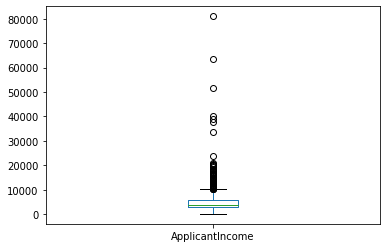

In [22]:
train['ApplicantIncome'].plot.box()

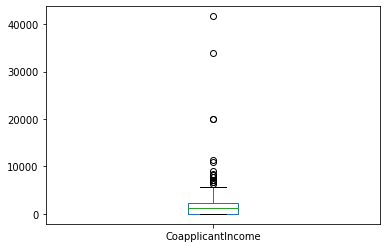

In [23]:
train['CoapplicantIncome'].plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


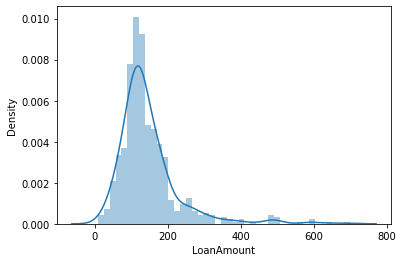

In [24]:
sns.distplot(train['LoanAmount'])

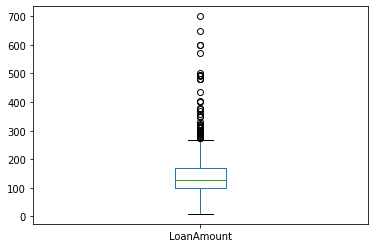

In [25]:
train['LoanAmount'].plot.box()

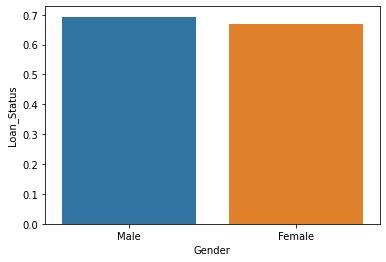

In [26]:
train['Loan_Status'] = train['Loan_Status'].map({ 'N' : 0, 'Y' : 1})
sns.barplot(x='Gender',y='Loan_Status',data=train,ci=None)

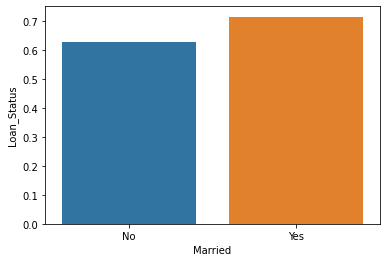

In [28]:
sns.barplot(x='Married',y='Loan_Status',data=train,ci=None)

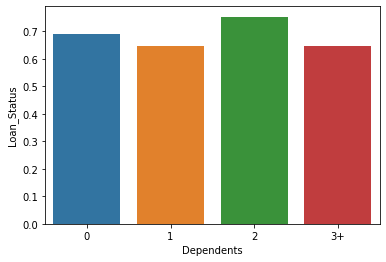

In [29]:
sns.barplot(x='Dependents',y='Loan_Status',data=train,ci=None)

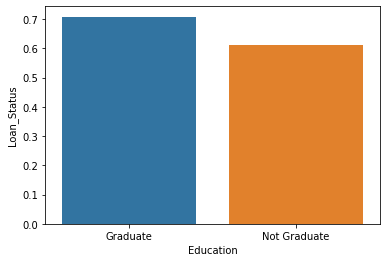

In [31]:
sns.barplot(x='Education',y='Loan_Status',data=train,ci=None)

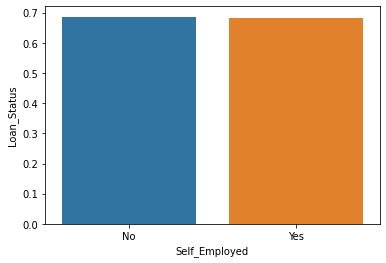

In [33]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=train,ci=None)

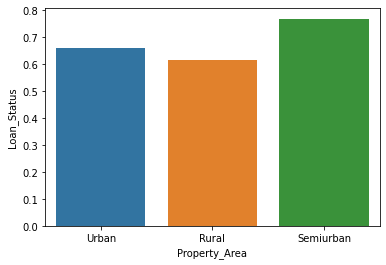

In [34]:
sns.barplot(x='Property_Area',y='Loan_Status',data=train,ci=None)

CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
ApplicantIncome     -0.004710
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


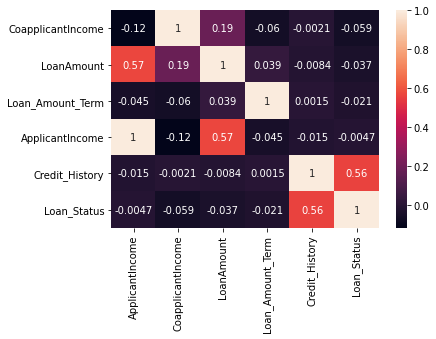

In [35]:
corr=train.corr()
corr.sort_values('Loan_Status',ascending=True,inplace=True)
print(corr['Loan_Status'])
sns.heatmap(corr,annot=True)

In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train['Married'].fillna(train['Married'].value_counts().index[0], inplace=True)
test['Married'].fillna(test['Married'].value_counts().index[0], inplace=True)

In [8]:
# If loan status is 1 then, dependent = 2 else dependent=1
train.loc[(train.Dependents.isnull())&(train.Loan_Status==1),'Dependents'] = '2'
train.loc[(train.Dependents.isnull()),'Dependents'] = '1'

# If Credit_History is 1 then, dependent = 2 else dependent=1 for test
test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

In [9]:
# If loan status is 1 then, Credit_History = 1 else Credit_History=0
train.loc[(train.Credit_History.isnull())&(train.Loan_Status==1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()),'Credit_History'] = 0

# Fill Null values with mode of Credit_History column for test
test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733, it was decided to impute credit history as 0 based upon the Income to loan ratio 
test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

In [10]:
# Fill Null values with mode of Gender column
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)

test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

In [11]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes
train.loc[(train.Self_Employed.isnull())&(train.Credit_History==1),'Self_Employed'] ='No'
train.loc[(train.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [12]:
#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train["Loan_Amount_Term"][train["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train["Loan_Amount_Term"][((train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med
        

#Impute Loan term  amount for test
index_NaN_Loan_Amount_Term_test = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = test["Loan_Amount_Term"].median() 
    Loan_Amount_Term_pred = test["Loan_Amount_Term"][(( test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(train["LoanAmount"][train["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = train["LoanAmount"][((train['Property_Area'] == train.iloc[i]["Property_Area"]) & (train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train['LoanAmount'].iloc[i] = LoanAmount_med
        
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test["LoanAmount"].median()
    LoanAmount_pred = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_med

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
train.isnull().sum()
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,4.653960
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [17]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [18]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,4.653960,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [20]:
del train['Loan_ID']
del test['Loan_ID']

In [21]:
cat_col = ['Gender', 'Married', 'Self_Employed', 'Education']
for column in cat_col:
    train1 = pd.get_dummies(train, columns = cat_col)
    test1 = pd.get_dummies(test, columns = cat_col)

In [33]:
train1["Dependents"] = train1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

train1["Property_Area"] = train1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

test1["Dependents"] = test1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

test1["Property_Area"] = test1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [22]:
train1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,5849,0.0,105.0,360.0,1.0,Urban,Y,4.653960,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0


In [23]:
del train1['ApplicantIncome']
del train1['CoapplicantIncome']
del train1['LoanAmount']

del test1['ApplicantIncome']
del test1['CoapplicantIncome']
del test1['LoanAmount']

In [24]:
train1.head()

,Dependents,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,360.0,1.0,Urban,Y,4.653960,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0


In [25]:
del train1['Total_Income']
del test1['Total_Income']

In [26]:
train1["Loan_Status"] = train1["Loan_Status"].map({"N": 0, "Y": 1})

In [27]:
train1.columns

Index(['Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_log', 'Total_Income_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Self_Employed_No',
       'Self_Employed_Yes', 'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [28]:
train1.columns

Index(['Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_log', 'Total_Income_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Self_Employed_No',
       'Self_Employed_Yes', 'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [29]:
y = train1['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train1.drop('Loan_Status', axis = 1), y, test_size=0.20, random_state=7, shuffle=True)

In [ ]:
# Finding best hyperparameters using Grid Search method for Random Forest to function

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 18.1min finished


In [ ]:
bestF.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 1200}

In [35]:
rfc = RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 1200, min_samples_split = 15, min_samples_leaf = 2)
                                   
modelr = rfc.fit(x_train, y_train)

y_pred = modelr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7723577235772358

In [ ]:
%%time

# Finding best hyperparameters for XGBoost to run using GridSearch method

import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(x_test, y_test)]
model = xgb.XGBClassifier(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(x_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.001, 'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 200, 'random_state': 42}
Best validation score = 0.7291280148423005
CPU times: user 5min 30s, sys: 6.47 s, total: 5min 36s
Wall time: 5min 35s


In [38]:
modelxg = xgb.XGBClassifier(gamma = 0.001, learning_rate = 0.001, max_depth = 8, n_estimators = 200, random_state = 42, objective='reg:squarederror')
modelxg.fit(x_train,y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.001, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
y_xg = modelxg.predict(x_test)
accuracy_score(y_test, y_xg)

0.7886178861788617

In [ ]:
A_pred = modelr.predict(test1)

In [ ]:
A_pred1 = modelxg.predict(test1)

In [ ]:
A_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
from pandas import DataFrame

df = DataFrame (A_pred,columns=['Loan_Status'])

In [ ]:
from pandas import DataFrame

df1 = DataFrame (A_pred1,columns=['Loan_Status'])

In [ ]:
df['Loan_Status'] = df['Loan_Status'].map({ 0 : 'N', 1 : 'Y'})

In [ ]:
df1['Loan_Status'] = df1['Loan_Status'].map({ 0 : 'N', 1 : 'Y'})

In [ ]:
df.to_csv('Pred2.csv',index=False,header=True)

In [ ]:
df1.to_csv('Pred3.csv',index=False,header=True)